# Sales Analysis 

In [1]:
import pandas as pd
import os

#### Merge the 12 months of sales data into a single csv file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)



## Read updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"



### Question 1: what was the best month for sales? How much was earned that month?


#### Solve Error 1: Drop rows of NAN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how="all")

#### Solve Error 2:  Remove order date rows with value "or"

In [5]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Task 1: add month column

In [6]:
all_data["month"] = all_data["Order Date"].str[0:2]
all_data["month"] = all_data["month"].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Solve Error 2: Convert columns to the correct type

In [7]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) #make int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])#make float


#### Task 2: add a sales column

In [8]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Solution 1:

In [9]:
import calendar
month_group = all_data.groupby('month').sum()
highest_selling_month = calendar.month_name[(month_group["Sales"].idxmax())]
highest_sales = month_group["Sales"].max()

print(month_group, "\n")
print(f"In {highest_selling_month} we had the highest sales: ${highest_sales}",)




       Quantity Ordered  Price Each       Sales
month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34 

In December we had the highest sales: $4613443.34


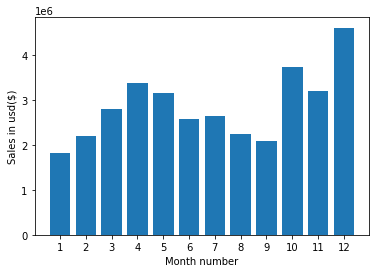

In [10]:
# visualise a total of sales made in each month

import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, month_group["Sales"])
plt.xticks(months)
plt.ylabel('Sales in usd($)')
plt.xlabel('Month number')
plt.show()


### Question 2: What city had the highest number of sales?

#### Task 1: add a city column

In [11]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x : f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


#### Solution 2:

In [12]:
city_group = all_data.groupby('City').sum()
highest_sales = city_group["Sales"].max()
highest_selling_city = city_group["Sales"].idxmax()

print(city_group, "\n")
print(f"City with the highest sales is {highest_selling_city} their sales were ${highest_sales}")


                     Quantity Ordered  Price Each   month       Sales
City                                                                 
 Atlanta (GA)                   16602  2779908.20  104794  2795498.58
 Austin (TX)                    11153  1809873.61   69829  1819581.75
 Boston (MA)                    22528  3637409.77  141112  3661642.01
 Dallas (TX)                    16730  2752627.82  104620  2767975.40
 Los Angeles (CA)               33289  5421435.23  208325  5452570.80
 New York City (NY)             27932  4635370.83  175741  4664317.43
 Portland (ME)                   2750   447189.25   17144   449758.27
 Portland (OR)                  11303  1860558.22   70621  1870732.34
 San Francisco (CA)             50239  8211461.74  315520  8262203.91
 Seattle (WA)                   16553  2733296.01  104941  2747755.48 

City with the highest sales is  San Francisco (CA) their sales were $8262203.91


### Question 3: What time should we display advertisements to maximize sales?

#### Task 1: Add a time column

In [13]:
all_data["Order Date"] = pd.to_datetime(all_data['Order Date'])
# create an hour column
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data["Count"]= 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Minute,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38,1


In [14]:
hour_group = all_data.groupby("Hour").count()
highest_orders = hour_group["Quantity Ordered"].max()
highest_selling_hour = hour_group["Sales"].idxmax()

print("Table showing in decending order of quantity ordered in the hour \n",hour_group.sort_values(by=['Quantity Ordered'], ascending=False), "\n")
print(f"Hour with the highest sales is {highest_selling_hour} with {highest_orders} orders")


Table showing in decending order of quantity ordered in the hour 
       Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
19       12905    12905             12905       12905       12905   
12       12587    12587             12587       12587       12587   
11       12411    12411             12411       12411       12411   
18       12280    12280             12280       12280       12280   
20       12228    12228             12228       12228       12228   
13       12129    12129             12129       12129       12129   
14       10984    10984             10984       10984       10984   
10       10944    10944             10944       10944       10944   
21       10921    10921             10921       10921       10921   
17       10899    10899             10899       10899       10899   
16       10384    10384             10384       10384       10384   
15       10175    10175             

### Question 4: What products are most often sold together?

#### Task 1: group data with order ID

In [15]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

# create a "Grouped" column that joins together the products columns with the same Order ID
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

# we now have duplicated order ID so lets remove duplicates
df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head(100)


/var/folders/p2/3l96vn8n4jq90ygd6k76mrmw0000gp/T/ipykernel_60459/1617116557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
2297,297847,"iPhone,Lightning Charging Cable"
2345,297894,"USB-C Charging Cable,AA Batteries (4-pack)"
2347,297895,"USB-C Charging Cable,27in FHD Monitor"
2398,297945,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."


In [16]:
#  count how often items are together
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list =  row.split(',')
#     print(row_list)
    count.update(Counter(combinations(row_list, 2)))

print(" The items that are sold together often are ", count.most_common(1))

# for key, value in count.most_common(10):
#     print(key, value)

 The items that are sold together often are  [(('iPhone', 'Lightning Charging Cable'), 1005)]


### Question 5: What product sold the most?

In [ ]:
product_group = all_data.groupby('Product').sum()
highestOrders = product_group["Quantity Ordered"].max()
highestSellingtProduct = product_group["Quantity Ordered"].idxmax()

# productGroup.head()
print(f"The highest selling product was {highestSellingtProduct} with {highestOrders} orders made.")


#### Show result on a bar chart

In [ ]:
product_group_1 = all_data.groupby('Product')
quantity_ordered = product_group_1.sum()["Quantity Ordered"]

products =  [product for product, df in product_group_1]

plt.bar(products, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Products")
plt.xticks(products, rotation="vertical",size=8)
plt.show()